In [1]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
theory_path = Path('/global/cscratch1/sd/damonge/CoLoRe_sims/sim_bs_1000')
bias_filename = Path(f'/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/BzBlue.txt')
nz_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/NzRed.txt')
pk_filename=Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box/input_files/Pk_CAMB_test.dat')

theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=2,
    nz_filename=nz_filename,
    pk_filename=pk_filename,
    param_cfg_filename='/global/cscratch1/sd/damonge/CoLoRe_sims/sim1000/out_params.cfg', #I need this to read the cosmological parameters
    bias_filename=bias_filename,
    apply_lognormal=True)

In [4]:
basedir = Path('/global/cscratch1/sd/cramirez/NBodyKit/hanyu_david_box')

In [5]:
def get_boxes(path, rsd1=False, rsd2=None,
                rmin=0.1, rmax=200, N_bins=41,
              zmin=0.5, zmax=0.7, nside=2):
    return FileFuncs.mix_sims(
        FileFuncs.get_full_path(path,
                                rsd=rsd1, rsd2=rsd2, 
                                rmin=rmin, rmax=rmax, N_bins=N_bins,
                                zmin=zmin, zmax=zmax, nside=2)
    )

In [6]:
boxes = dict()
boxes[1] = get_boxes(basedir / 'analysis')
boxes[0.5] = get_boxes(basedir / 'analysis_0.5')

In [7]:
z = theory.get_zeff(0.5, 0.7)

In [8]:
theory.bias(z)

array(1.37389822)

/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/global/homes/c/cramirez/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


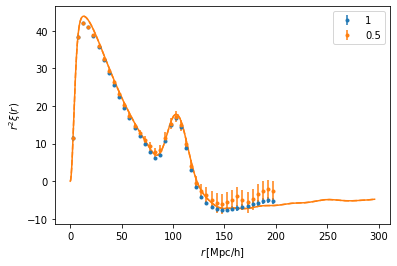

In [9]:
fig, ax = plt.subplots()
pole=0

downsampling=1
Plots.plot_data(pole, boxes[downsampling], ax=ax, plot_args=dict(c='C0', label='1'))
downsampling=0.5
Plots.plot_data(pole, boxes[downsampling], ax=ax, plot_args=dict(c='C1', label='0.5'))
Plots.plot_theory(pole, z=z, theory=theory, ax=ax, rsd=False)
ax.legend()

In [10]:
%matplotlib widget